In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

Humidity data missing values:  time     0
value    0
dtype: int64
Temperature data missing values:  time     0
value    0
dtype: int64


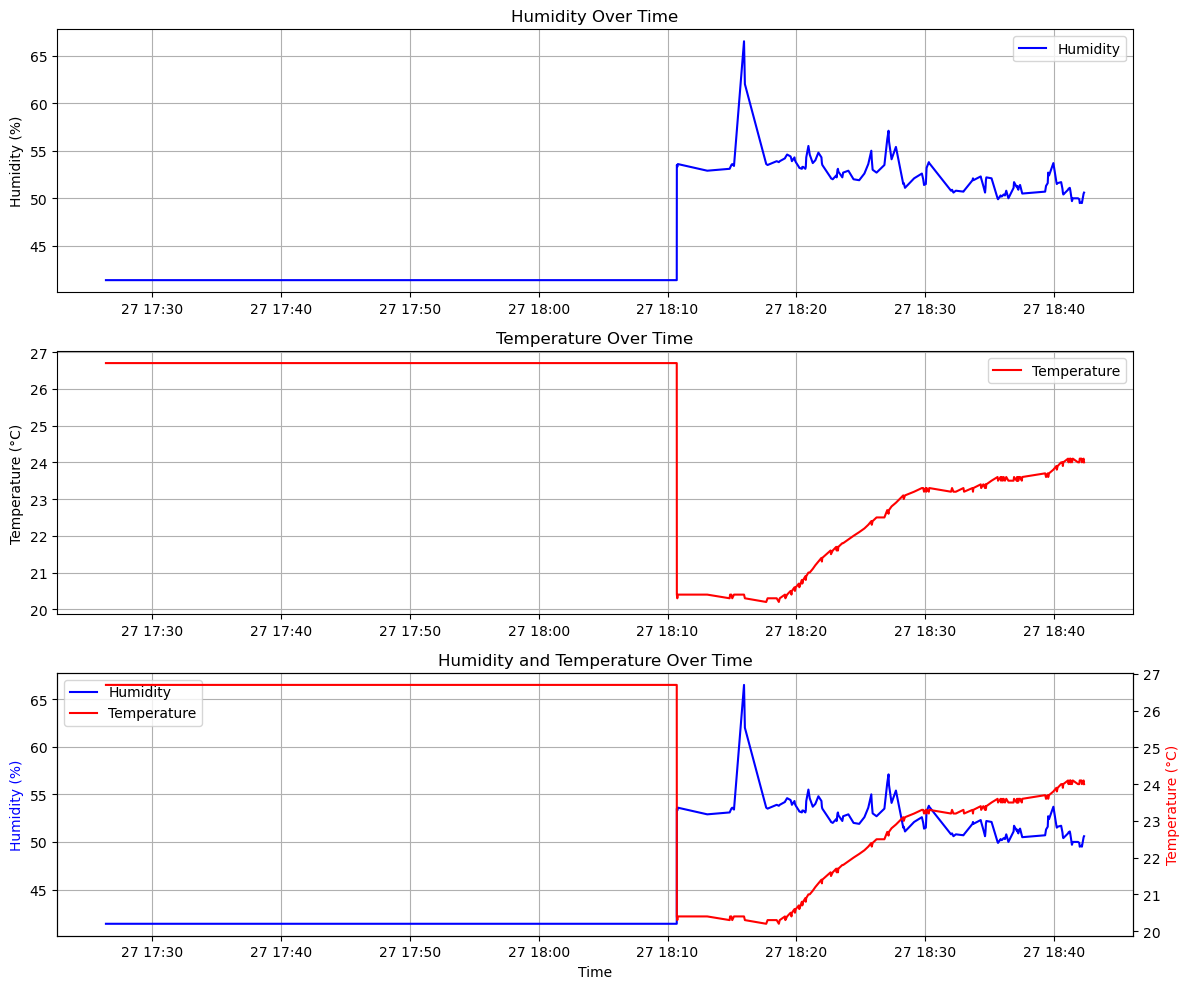


Data Analysis:
Time period: 2025-08-27 17:26:24.056586712+00:00 to 2025-08-27 18:42:19.488734993+00:00
Humidity range: 41.40% to 66.50%
Temperature range: 20.20°C to 26.70°C
Correlation between humidity and temperature: -0.732

Highest humidity event: 66.50% at 2025-08-27 18:15:55.786563441+00:00
Highest temperature event: 26.70°C at 2025-08-27 17:26:24.056586712+00:00


In [17]:
humidity_df = pd.read_csv('humidity.csv')
temperature_df = pd.read_csv("randomTemperature.csv")

humidity_df['time'] = pd.to_datetime(humidity_df['time'])
temperature_df['time'] = pd.to_datetime(temperature_df['time'])

humidity_df = humidity_df.sort_values('time')
temperature_df = temperature_df.sort_values('time')

print("Humidity data missing values: ", humidity_df.isnull().sum())
print("Temperature data missing values: ", temperature_df.isnull().sum())

humidity_df = humidity_df.dropna()
temperature_df = temperature_df.dropna()

merged_df = pd.merge(humidity_df, temperature_df, on = 'time', how = 'inner', suffixes = ("_humidity", "_temperature"))

fig, axes = plt.subplots(3, 1, figsize = (12, 10))

axes[0].plot(merged_df['time'], merged_df['value_humidity'], 'b-', label = 'Humidity')
axes[0].set_ylabel('Humidity (%)')
axes[0].set_title('Humidity Over Time')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(merged_df['time'], merged_df['value_temperature'], 'r-', label='Temperature')
axes[1].set_ylabel('Temperature (°C)')
axes[1].set_title('Temperature Over Time')
axes[1].grid(True)
axes[1].legend()

ax2 = axes[2].twinx()
lns1 = axes[2].plot(merged_df['time'], merged_df['value_humidity'], 'b-', label='Humidity')
lns2 = ax2.plot(merged_df['time'], merged_df['value_temperature'], 'r-', label='Temperature')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Humidity (%)', color='b')
ax2.set_ylabel('Temperature (°C)', color='r')
axes[2].set_title('Humidity and Temperature Over Time')
axes[2].grid(True)

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
axes[2].legend(lns, labs, loc='upper left')

plt.tight_layout()
plt.savefig('sensor_data_analysis.png', dpi=300)
plt.show()

print("\nData Analysis:")
print(f"Time period: {merged_df['time'].min()} to {merged_df['time'].max()}")
print(f"Humidity range: {merged_df['value_humidity'].min():.2f}% to {merged_df['value_humidity'].max():.2f}%")
print(f"Temperature range: {merged_df['value_temperature'].min():.2f}°C to {merged_df['value_temperature'].max():.2f}°C")

# Calculate correlation
correlation = np.corrcoef(merged_df['value_humidity'], merged_df['value_temperature'])[0, 1]
print(f"Correlation between humidity and temperature: {correlation:.3f}")

# Identify significant events
humidity_spike = merged_df.loc[merged_df['value_humidity'].idxmax()]
print(f"\nHighest humidity event: {humidity_spike['value_humidity']:.2f}% at {humidity_spike['time']}")

temp_spike = merged_df.loc[merged_df['value_temperature'].idxmax()]
print(f"Highest temperature event: {temp_spike['value_temperature']:.2f}°C at {temp_spike['time']}")